In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
train_data_url = "https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv"
train_df = pd.read_csv(train_data_url)
print(train_df.head())

      ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4    

In [4]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB
None


In [9]:
print(train_df.describe())

                 ID           age        balance           day      duration  \
count  31647.000000  31647.000000   31647.000000  31647.000000  31647.000000   
mean   22563.972162     40.957247    1363.890258     15.835466    258.113534   
std    13075.936990     10.625134    3028.304293      8.337097    257.118973   
min        2.000000     18.000000   -8019.000000      1.000000      0.000000   
25%    11218.000000     33.000000      73.000000      8.000000    104.000000   
50%    22519.000000     39.000000     450.000000     16.000000    180.000000   
75%    33879.500000     48.000000    1431.000000     21.000000    318.500000   
max    45211.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  31647.000000  31647.000000  31647.000000  
mean       2.765697     39.576042      0.574272  
std        3.113830     99.317592      2.422529  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.00

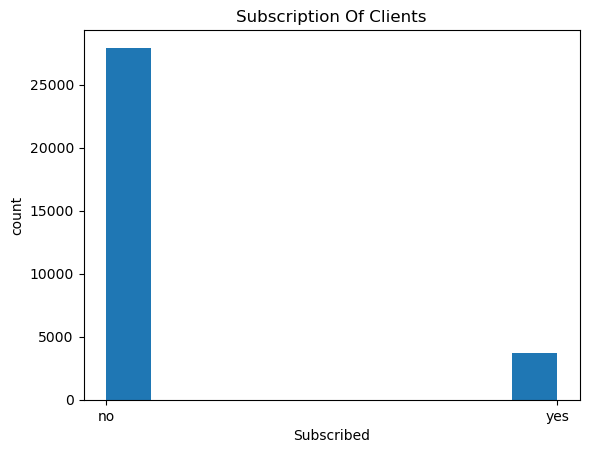

In [19]:
plt.hist(train_df['subscribed'])
plt.xlabel('Subscribed')
plt.ylabel('count')
plt.title('Subscription Of Clients')
plt.show()

In [24]:
test_data_url = "https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv"
test_df = pd.read_csv(test_data_url)
print(test_df.head())

      ID  age            job   marital  education default  balance housing  \
0  38441   32       services   married  secondary      no      118     yes   
1  40403   78        retired  divorced    primary      no     2787      no   
2   3709   31  self-employed    single   tertiary      no      144     yes   
3  37422   57       services    single    primary      no     3777     yes   
4  12527   45    blue-collar  divorced  secondary      no     -705      no   

  loan    contact  day month  duration  campaign  pdays  previous poutcome  
0   no   cellular   15   may        20         6     -1         0  unknown  
1   no  telephone    1   jul       372         1     -1         0  unknown  
2   no    unknown   16   may       676         1     -1         0  unknown  
3   no  telephone   13   may        65         2     -1         0  unknown  
4  yes    unknown    3   jul       111         1     -1         0  unknown  


In [26]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB
None


In [27]:
print(test_df.describe())

                 ID           age       balance           day      duration  \
count  13564.000000  13564.000000  13564.000000  13564.000000  13564.000000   
mean   22704.057726     40.887128   1358.496535     15.738646    258.278679   
std    12994.043329     10.604108   3082.940623      8.288174    258.488648   
min        1.000000     18.000000  -3313.000000      1.000000      0.000000   
25%    11546.000000     33.000000     71.000000      8.000000    102.000000   
50%    22782.000000     39.000000    445.000000     16.000000    180.000000   
75%    33974.250000     48.000000   1413.250000     21.000000    319.000000   
max    45206.000000     95.000000  98417.000000     31.000000   3253.000000   

           campaign         pdays      previous  
count  13564.000000  13564.000000  13564.000000  
mean       2.759510     41.648555      0.594441  
std        3.060928    101.985178      1.998193  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000     

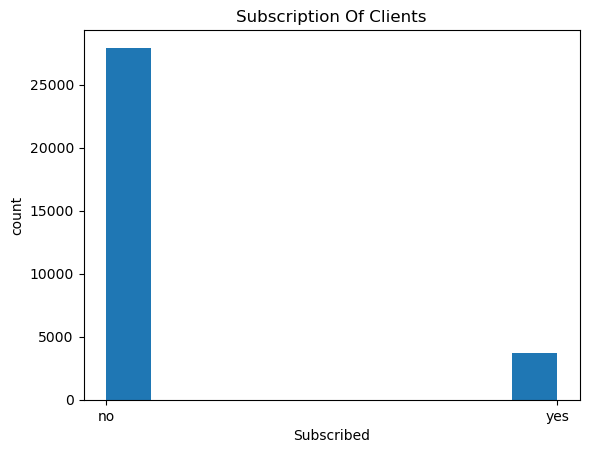

In [28]:
plt.hist(train_df['subscribed'])
plt.xlabel('Subscribed')
plt.ylabel('count')
plt.title('Subscription Of Clients')
plt.show()

In [32]:
X_train = train_df.drop('Subscribed', axis=1)
y_train = train_df['Subscribed']

X_test = test_df.drop('Subscribed', axis=1)
y_test_actual = test_df['Subscribed']

X = pd.get_dummies(X)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

accuracy = accuracy_score(y_test_actual, y_test_pred)
print("Accuracy:", accuracy)

KeyError: "['Subscribed'] not found in axis"